# Introduction to Python  

### Pandas Descriptive Statistics and Visualization

In [1]:
#import pip
#pip.main(['install','seaborn'])
#pip.main(['install','xlrd'])

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### First Case Study: Voters analysis

#### Reading Dataframe from Excel

In [3]:
dfvote = pd.read_excel(os.path.join('../Data','CSV','votesurvey.xls'))

In [4]:
type(dfvote)

pandas.core.frame.DataFrame

#### First steps examining data

In [5]:
dfvote.head(8)

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush


In [6]:
dfvote.tail(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
38,Male,29,25000,100000,Refuse to answer
39,Male,25,5000,100000,Refuse to answer
40,Male,28,45000,180000,Refuse to answer
41,Male,29,100000,150000,Refuse to answer
42,Male,27,48000,120000,Refuse to answer
43,Female,25,45000,80000,Undecided
44,Female,27,56000,95000,Undecided
45,Male,28,90000,150000,Undecided
46,Female,27,65000,100000,Undecided
47,Male,29,39000,90000,Undecided


In [7]:
dfvote.describe()

,Age,Salary before Stern,Expected salary
count,48.000000,48.000000,48.000000
mean,27.187500,70145.833333,109166.666667
std,2.038525,37886.723427,25730.463221
min,24.000000,5000.000000,75000.000000
25%,25.750000,48750.000000,90000.000000
50%,27.000000,59500.000000,100000.000000
75%,29.000000,80500.000000,121250.000000
max,33.000000,225000.000000,180000.000000


### Plotting: Histogram  

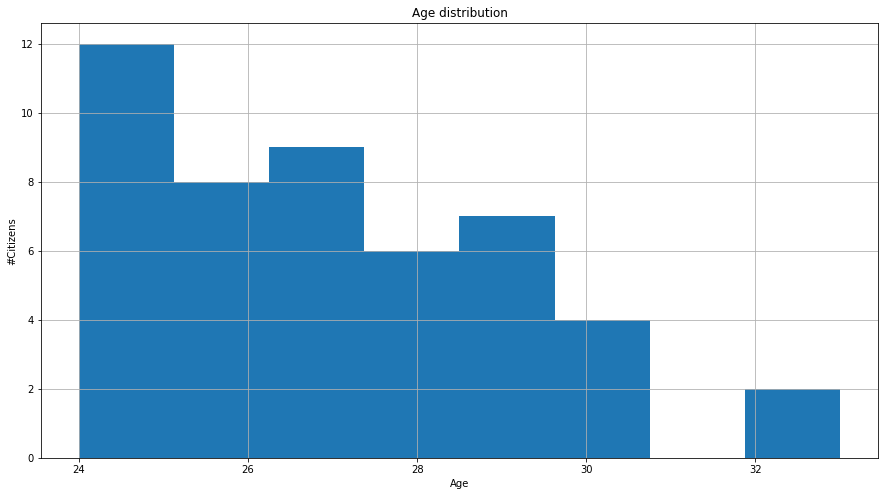

In [8]:
# Using Matplotlib calls

fig = plt.figure(figsize=(15,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(dfvote['Age'],bins = 8) # Here you can play with number of bins Labels and Tit

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Citizens')
plt.grid()
plt.show()

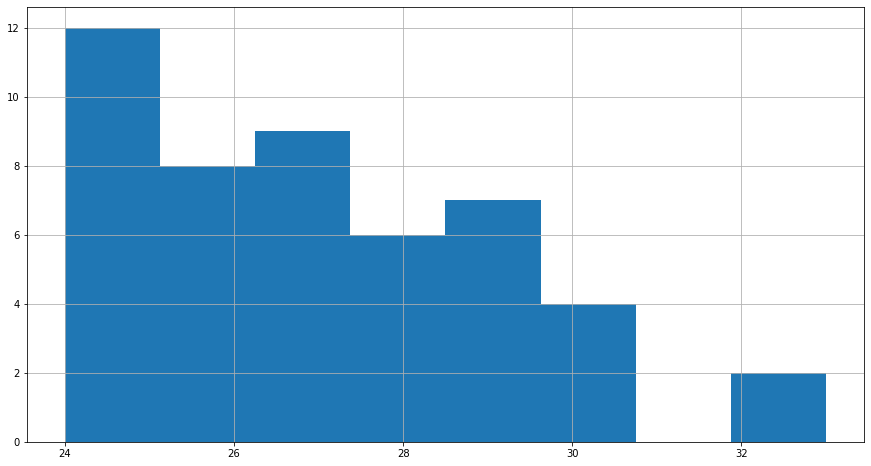

In [9]:
# Plotting within Pandas

dfvote.Age.hist(figsize=(15,8), bins=8);
#dfvote['Age'].hist(figsize=(15,8), bins=8);

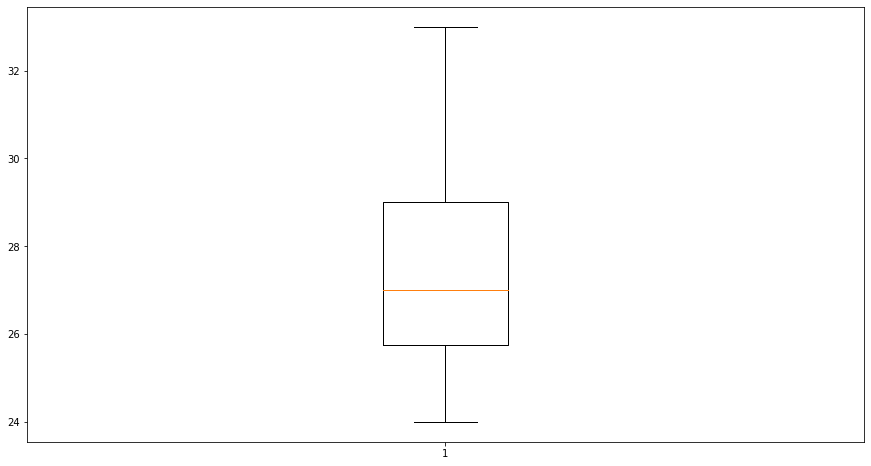

In [10]:
# Using Matplotlib calls

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.boxplot(dfvote['Age'])
plt.show()

### Box Plot  

In [11]:
dfvote.columns

Index(['Gender', 'Age', 'Salary before Stern', 'Expected salary', 'Candidate'], dtype='object')

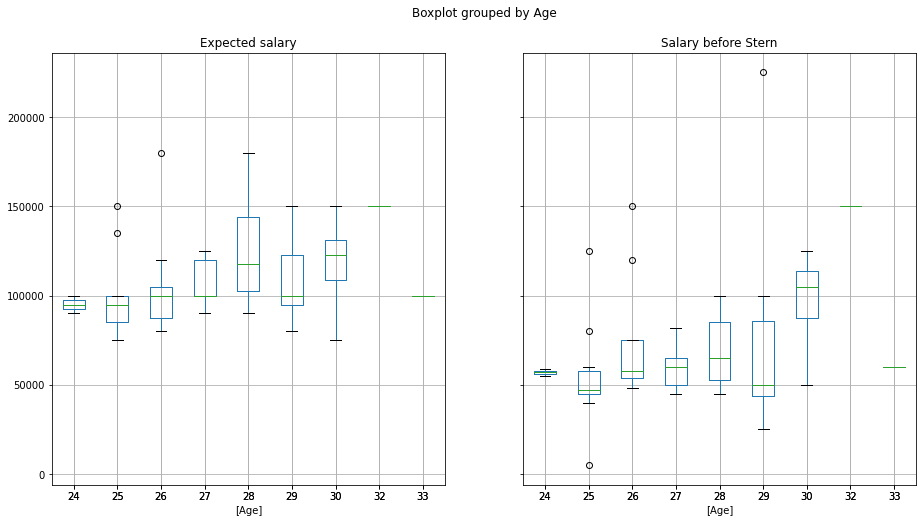

In [12]:
# Plotting within Pandas
#dfvote[['Age', 'Expected salary']].boxplot(by='Age', figsize=(15,8));
dfvote.boxplot(by='Age', figsize=(15,8));

### Violin Plot (using Seaborn)  

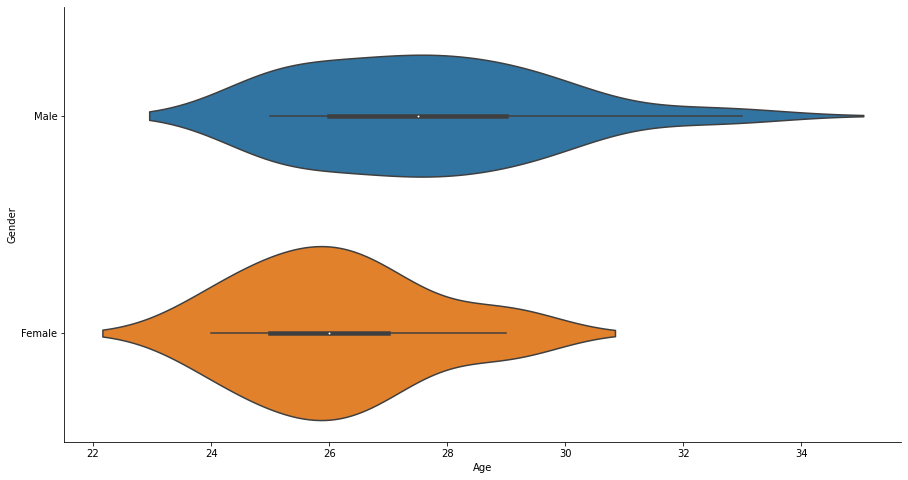

In [13]:
fig = plt.figure(figsize=(15,8))

sns.violinplot(x=dfvote['Age'], y=dfvote['Gender'])
sns.despine()

### Bar Chart  

In [14]:
dfvote.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush
9,Male,26,120000,80000,Bush


In [15]:
grouped = dfvote.groupby('Gender').mean()
grouped

,Age,Salary before Stern,Expected salary
Gender,,,
Female,26.142857,61500.000000,99642.857143
Male,27.617647,73705.882353,113088.235294


<AxesSubplot:xlabel='Gender'>

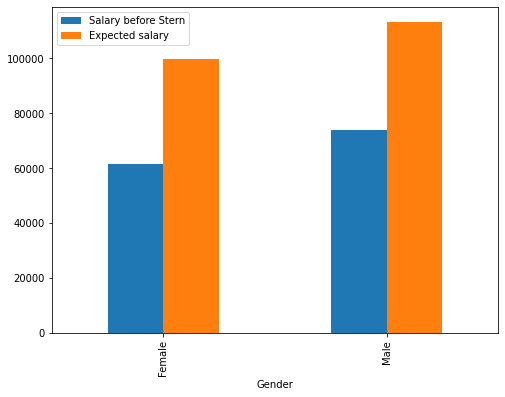

In [16]:
grouped[['Salary before Stern','Expected salary']].plot(kind='bar', figsize=(8,6))

In [17]:
var = dfvote.groupby('Candidate').Age.mean()
var

Candidate
Bush                27.000000
Gore                27.277778
Refuse to answer    27.300000
Undecided           27.200000
Name: Age, dtype: float64

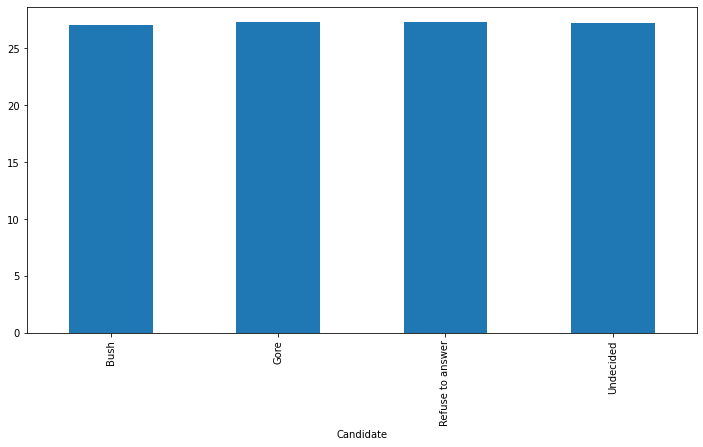

In [18]:
var.plot(kind='bar', figsize=(12,6));

### Line Chart  

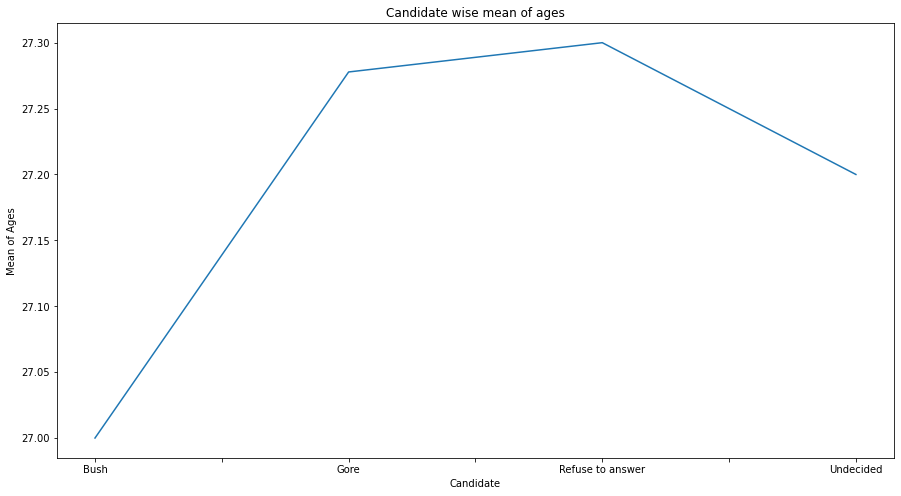

In [19]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
ax1.set_xlabel('Candidate')
ax1.set_ylabel('Mean of Ages')
ax1.set_title("Candidate wise mean of ages")

var.plot(ax=ax1, kind='line');

### Stacked Column Chart  

In [20]:
dfvote.head()

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush


In [21]:
var = dfvote.groupby(['Age','Gender']).sum()
var

Salary before Stern  Expected salary
Age Gender                                      
24  Female               114000           190000
25  Female               139000           250000
    Male                 405000           750000
26  Female               320000           470000
    Male                 279000           380000
27  Female               166000           285000
    Male                 375000           675000
28  Male                 415000           755000
29  Female               122000           200000
    Male                 437000           565000
30  Male                 385000           470000
32  Male                 150000           150000
33  Male                  60000           100000

In [22]:
var.unstack()

Salary before Stern           Expected salary          
Gender              Female      Male          Female      Male
Age                                                           
24                114000.0       NaN        190000.0       NaN
25                139000.0  405000.0        250000.0  750000.0
26                320000.0  279000.0        470000.0  380000.0
27                166000.0  375000.0        285000.0  675000.0
28                     NaN  415000.0             NaN  755000.0
29                122000.0  437000.0        200000.0  565000.0
30                     NaN  385000.0             NaN  470000.0
32                     NaN  150000.0             NaN  150000.0
33                     NaN   60000.0             NaN  100000.0

<AxesSubplot:xlabel='Age'>

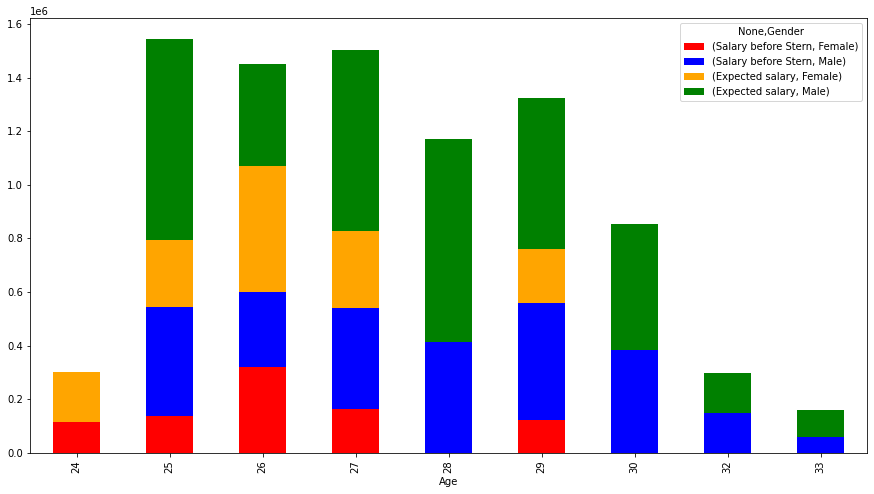

In [23]:
var.unstack().plot(kind='bar', 
                   stacked=True, 
                   color=['red','blue','orange','green'], 
                   grid=False, 
                   figsize=(15,8))

### Scatter Plot  

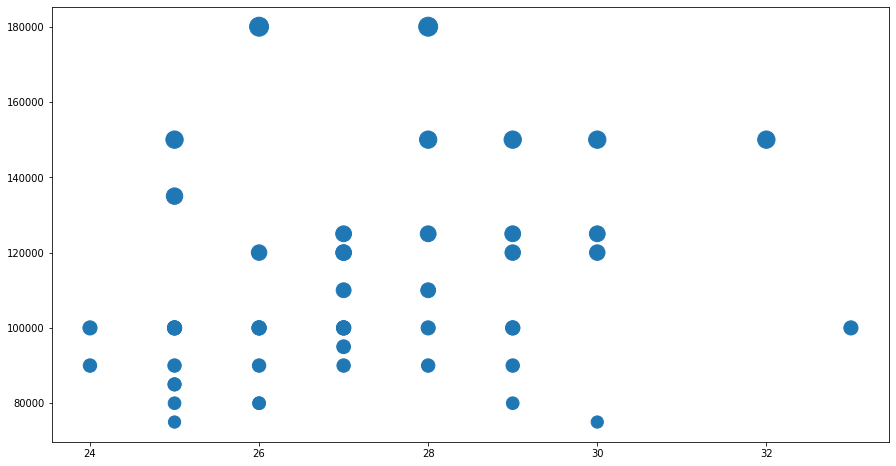

In [24]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=dfvote['Age'], 
           y=dfvote['Expected salary'],
           s=dfvote['Expected salary']/500) #You can also add more variables here to represent color and size.
plt.show()

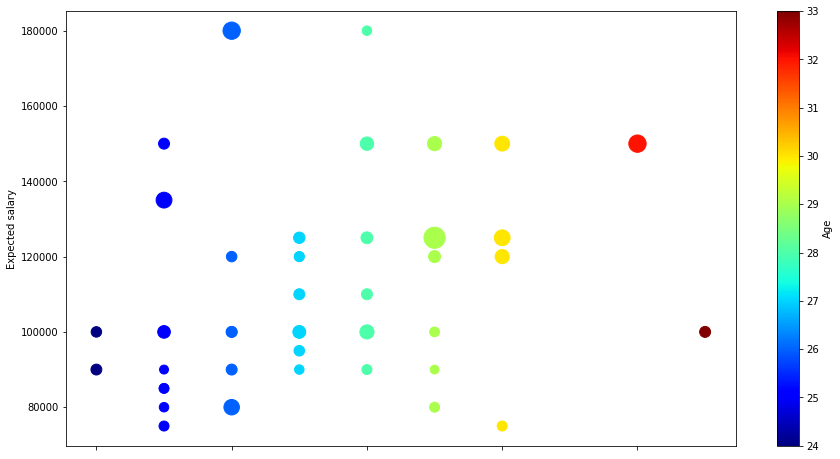

In [25]:
dfvote.plot.scatter(x='Age',
                    y='Expected salary', 
                    c='Age', 
                    s=dfvote['Salary before Stern']/500, 
                    cmap='jet', 
                    figsize=(15,8));

### Pie chart  

In [26]:
var = dfvote.groupby(['Gender']).mean().stack()
var

Gender                     
Female  Age                        26.142857
        Salary before Stern     61500.000000
        Expected salary         99642.857143
Male    Age                        27.617647
        Salary before Stern     73705.882353
        Expected salary        113088.235294
dtype: float64

In [27]:
temp = var.unstack()
temp

,Age,Salary before Stern,Expected salary
Gender,,,
Female,26.142857,61500.000000,99642.857143
Male,27.617647,73705.882353,113088.235294


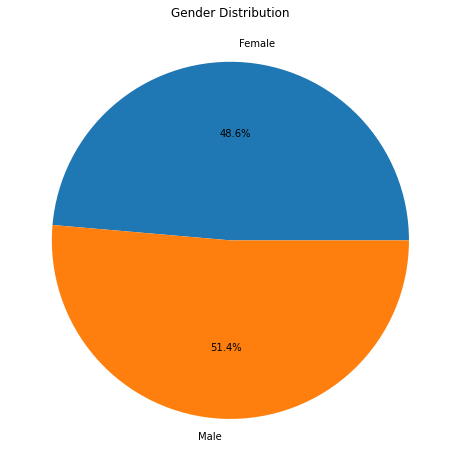

In [28]:
x_list = temp['Age']
label_list = temp.index

#The pie chart is oval by default. To make it a circle use plt.axis("equal")
fig = plt.figure(figsize=(8,8))
plt.axis("equal")

#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Gender Distribution")
plt.show()

### Second Case Study: Melbourne House Prices

#### Reading Dataframe from CSV

In [29]:
df = pd.read_csv('../Data/CSV/MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [30]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,31/03/2018,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Type'] = df['Type'].astype('category')
df['Method'] = df['Method'].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63023 non-null  object        
 1   Address        63023 non-null  object        
 2   Rooms          63023 non-null  int64         
 3   Type           63023 non-null  category      
 4   Price          48433 non-null  float64       
 5   Method         63023 non-null  category      
 6   SellerG        63023 non-null  object        
 7   Date           63023 non-null  datetime64[ns]
 8   Postcode       63023 non-null  int64         
 9   Regionname     63023 non-null  object        
 10  Propertycount  63023 non-null  int64         
 11  Distance       63023 non-null  float64       
 12  CouncilArea    63023 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 5.4+ MB


In [34]:
df['Type'].unique()

['h', 't', 'u']
Categories (3, object): ['h', 't', 'u']

In [35]:
df['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [36]:
average = df['Price'].mean()
print('{:.2f}'.format(average))

997898.24


In [37]:
med = df['Price'].median()
print('{:.2f}'.format(med))

830000.00


In [38]:
standard_deviation = df['Price'].std()
print('{:.2f}'.format(standard_deviation))

593498.92


In [39]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


/home/renato/Documentos/envs/default/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


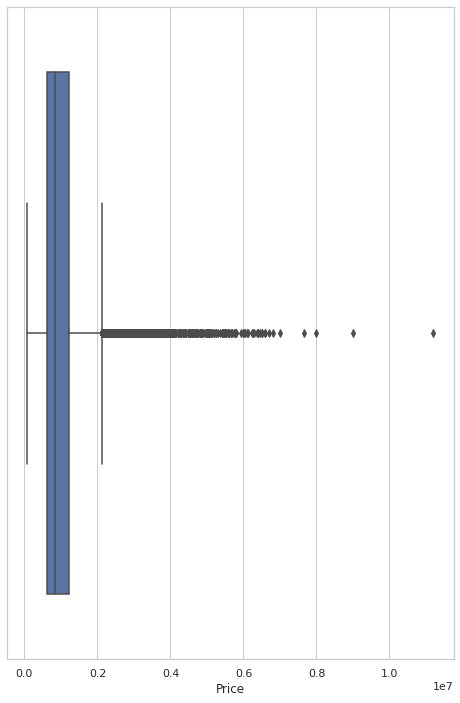

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,12))
ax = sns.boxplot(x='Price', data=df, orient="v")

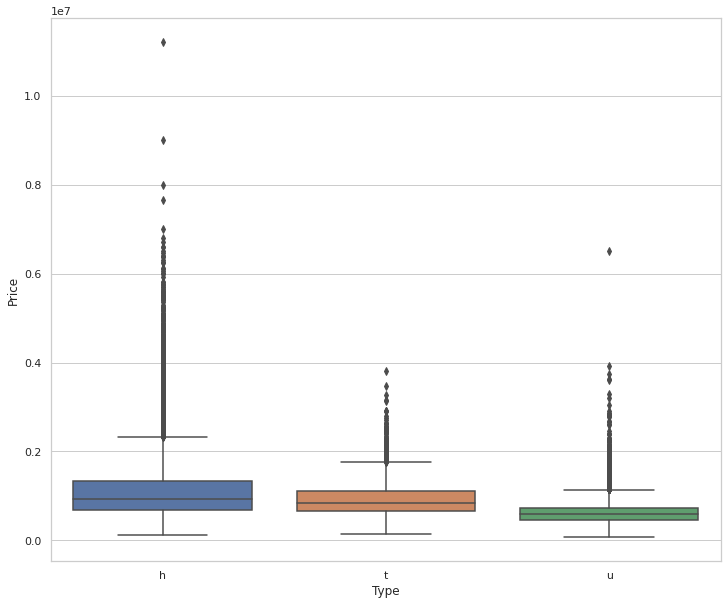

In [41]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

<AxesSubplot:xlabel='Price', ylabel='Count'>

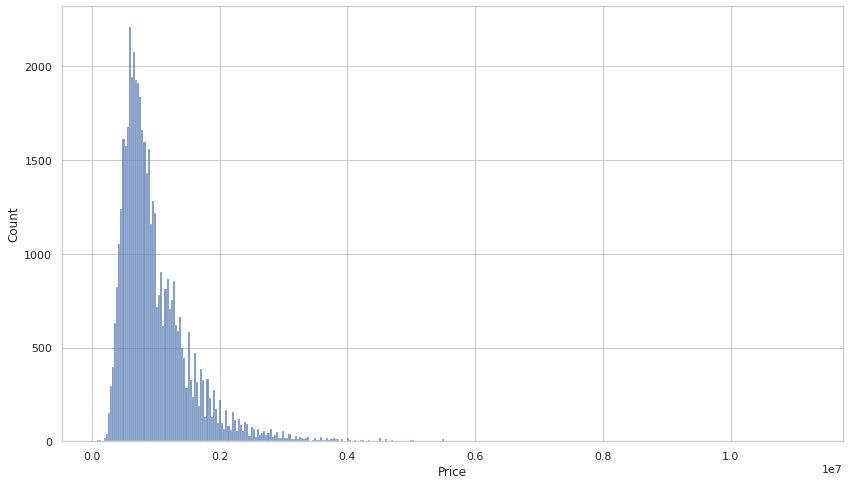

In [42]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))

sns.histplot(filter_data['Price'], kde=False)

<AxesSubplot:ylabel='house_type'>

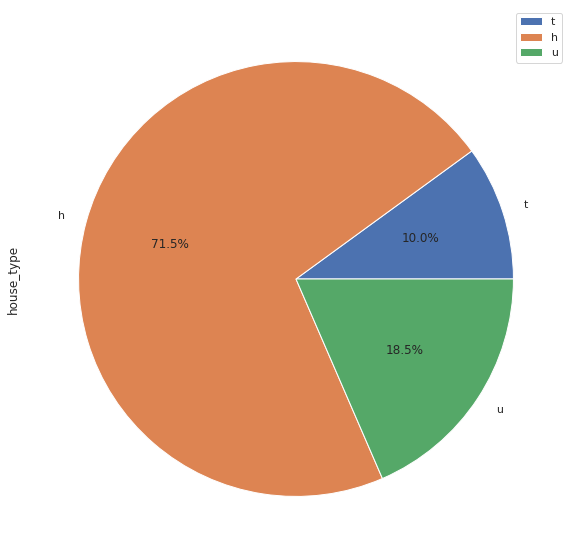

In [43]:
type_counts = df['Type'].value_counts()

df2 = pd.DataFrame({'house_type': type_counts}, index = ['t', 'h', 'u'])
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

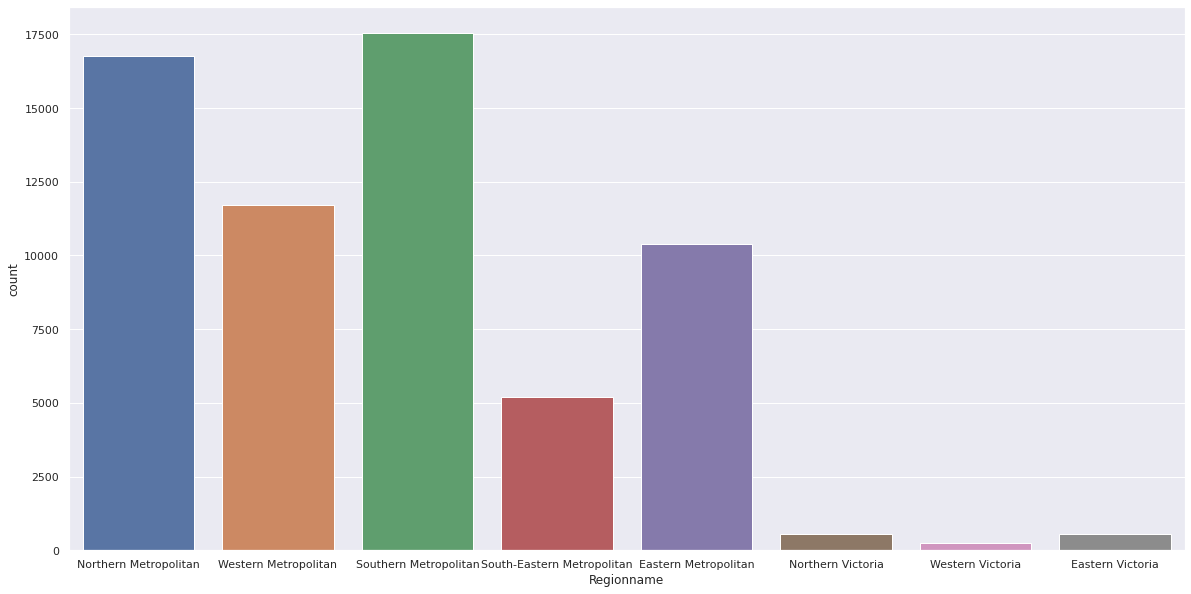

In [44]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Regionname', data=df)
#plt.savefig('./myfig.jpg')

In [45]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


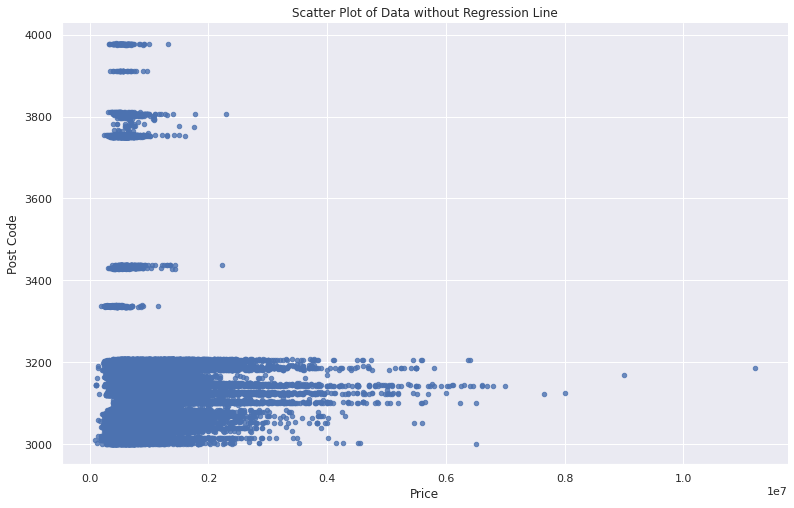

In [46]:
sns.lmplot(x='Price', 
           y='Postcode', 
           data=df, 
           fit_reg=False, 
           scatter_kws={"marker": "D", "s": 20}, 
           height=7, 
           aspect=1.6) 
plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('Price')
plt.ylabel('Post Code')
plt.show()